In [1]:
import numpy as np
import pandas as pd
import math
import os
import networkx as nx
import matplotlib.pyplot as plt

In [73]:
save_dir = "Saved Data/G_withDOI_v0"

G = nx.read_graphml(save_dir + "Graph.graphml")

In [3]:
df = pd.read_csv("../Data (Reformatted)/df_all.csv")

all_mat = set(df[(df["mat"]!="unknown")]["mat"].dropna())


all_app = set(df[(df["app"]!="unknown")]["app"].dropna())


all_prod = set(df[(df["prod"]!="unknown")]["prod"].dropna())

## Material

In [7]:
mat_nodes = [node for node, data in G.nodes(data=True) if data.get("node_type") == "material"]

In [8]:
mat_nodes

['coal fly ash',
 'rubber waste',
 'demolished concrete waste',
 'palm oil clinker',
 'Class F fly ash',
 'MSWI bottom ash',
 'coal bottom ash',
 'albite',
 'basalt fiber',
 'stone powder',
 'construction waste',
 'mine tailings',
 'soda ash',
 'lime',
 'red mud',
 'cellulose',
 'fine recycled concrete aggregate',
 'blast furnace slag',
 'construction and demolition waste',
 'limestone powder',
 'calcium carbide residue',
 'natural pozzolan',
 'microsilica',
 'nano-silica',
 'metakaolin',
 'copper tailing',
 'Corex slag',
 'waste rubber particles',
 'coarse recycled concrete aggregate',
 'aluminium hydroxide',
 'hemicellulose',
 'harbor sediment',
 'limestone',
 'sewage sludge ash',
 'lignin',
 'gypsum',
 'oil palm shell',
 'fluid catalytic cracking catalyst residue',
 'silica',
 'FeMn arc-furnace slag',
 'flax fibre',
 'glass fibre',
 'waste glass',
 'water treatment sludge',
 'palm oil fuel ash',
 'electric arc furnace slag',
 'biochar',
 'kaolin',
 'water treatment sludge waste',
 '

In [58]:
mat_pairs = []
for mat1 in mat_nodes:
    for mat2 in mat_nodes:
        mat_pairs.append((mat1, mat2))

# Jaccard Coefficent

In [59]:
mat_similarity_jaccard = nx.jaccard_coefficient(G, mat_pairs)

In [60]:
mat_jaccard_records = []
for u, v, p in mat_similarity_jaccard:
    record = {
        "material1": u,
        "material2": v,
        "jaccard":   p
    }
    mat_jaccard_records.append(record)

df_mat_jaccard = pd.DataFrame.from_records(mat_jaccard_records)

In [71]:
df_mat_jaccard

,material1,material2,jaccard
0,coal fly ash,coal fly ash,1.000000
1,coal fly ash,rubber waste,0.004090
2,coal fly ash,demolished concrete waste,0.003074
3,coal fly ash,palm oil clinker,0.006048
4,coal fly ash,Class F fly ash,0.013587
...,...,...,...
5620,basalt,calcined clay,0.043478
5621,basalt,recycled aggregate,0.041667
5622,basalt,microorganisms-based bioplasticizer,0.083333
5623,basalt,MSWI fly ash,0.035714


In [72]:
df_mat_jaccard.to_csv(save_dir + "MAT_Jaccard.csv", index=False)

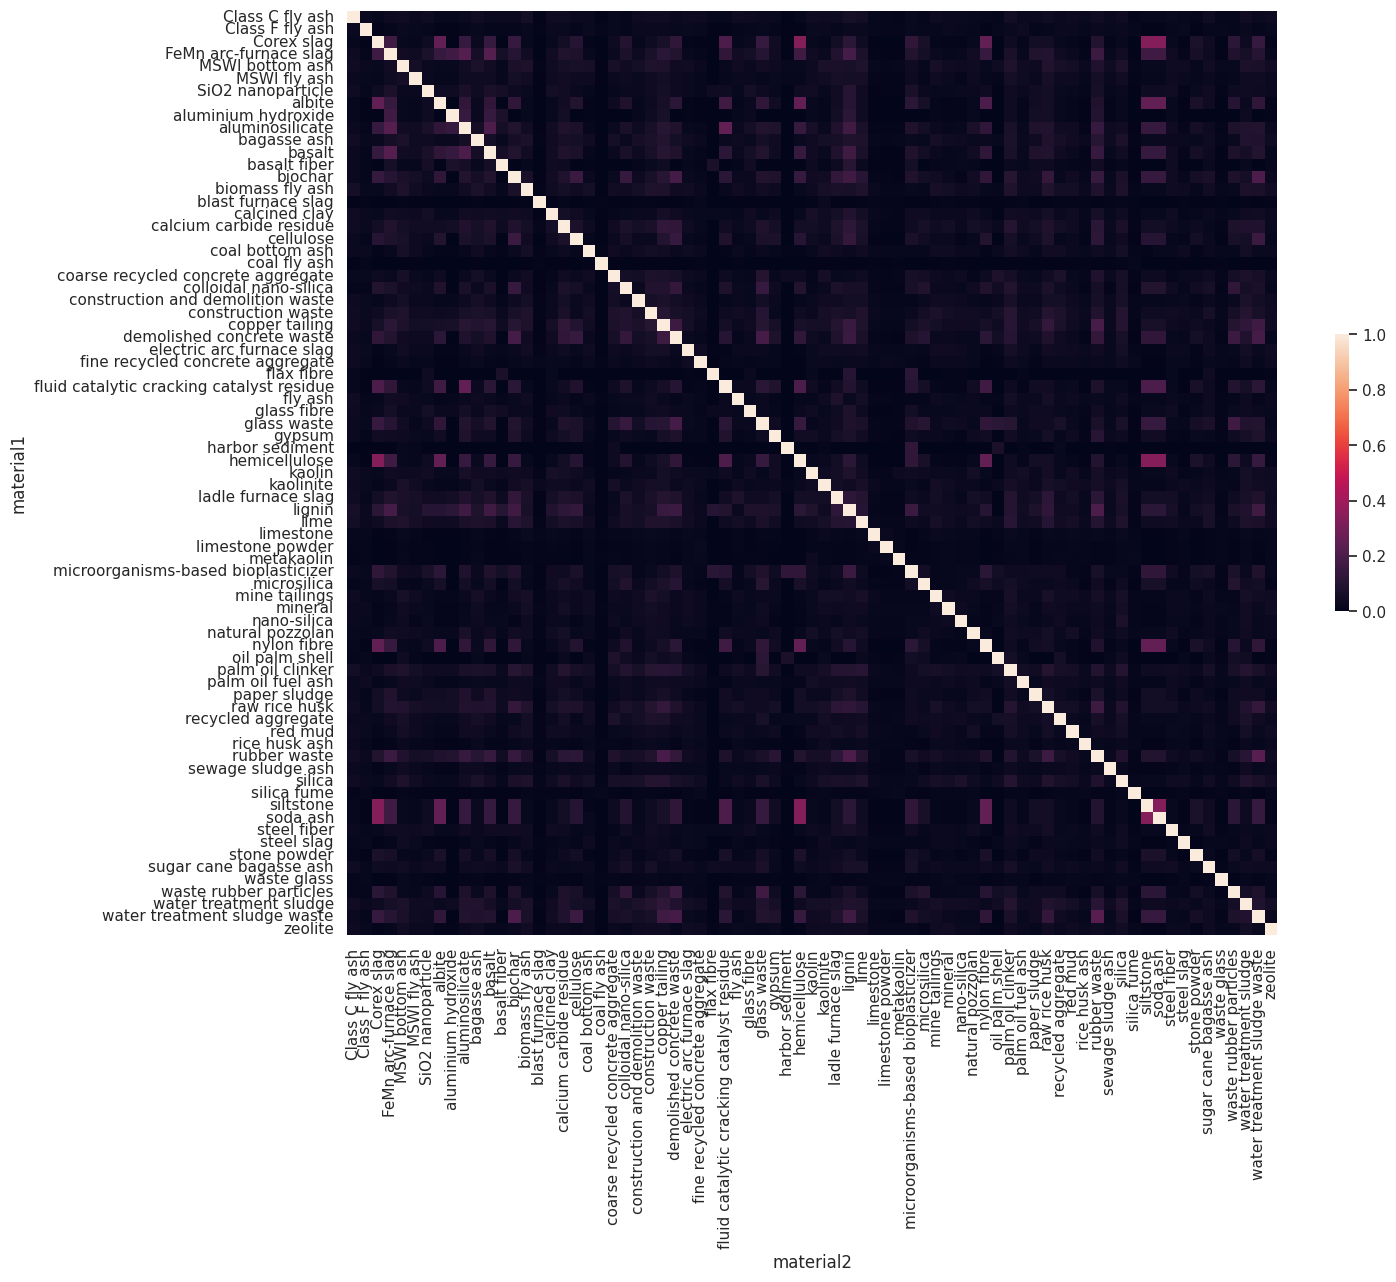

In [70]:
data = df_mat_jaccard.pivot(index="material1", columns="material2", values="jaccard")

import seaborn as sns
sns.set(rc={'figure.figsize':(15, 12)})
heatmap = sns.heatmap(data, vmin=0, vmax=1, cbar_kws={'shrink': 0.3}, xticklabels=True, yticklabels=True)

fig = heatmap.get_figure()

import os
fig_dir = "../Figs/Graph/"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

fig.savefig(fig_dir + "mat_jaccard_heatmap.jpg", bbox_inches="tight")